Using `ECOv002-CMR` package to retrieve ECOSTRESS granules as inputs using the Common Metadata Repository (CMR) API. Using `ECOv002-L3T-L4T-JET` package to run the product generating executable (PGE).

In [1]:
import numpy as np
from ECOv002_CMR import download_ECOSTRESS_granule
from ECOv003_L3T_L4T_JET import generate_L3T_L4T_JET_runconfig, L3T_L4T_JET

[2025-11-17 15:30:48 INFO] SRTM working directory: ~/data/NASADEM
[2025-11-17 15:30:48 INFO] SRTM download directory: ~/data/NASADEM


Disable logger output in notebook

In [2]:
import logging

logging.getLogger().handlers = []

Set working directory

In [3]:
working_directory = "~/data/ECOSTRESS"
static_directory = "~/data/L3T_L4T_static"

Retrieve LST LSTE granule from CMR API for target date

In [4]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=35698,
    scene=14,
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_LSTE_granule

L2TLSTE("/Users/gregoryhalverson/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01")

Load and display preview of surface temperature

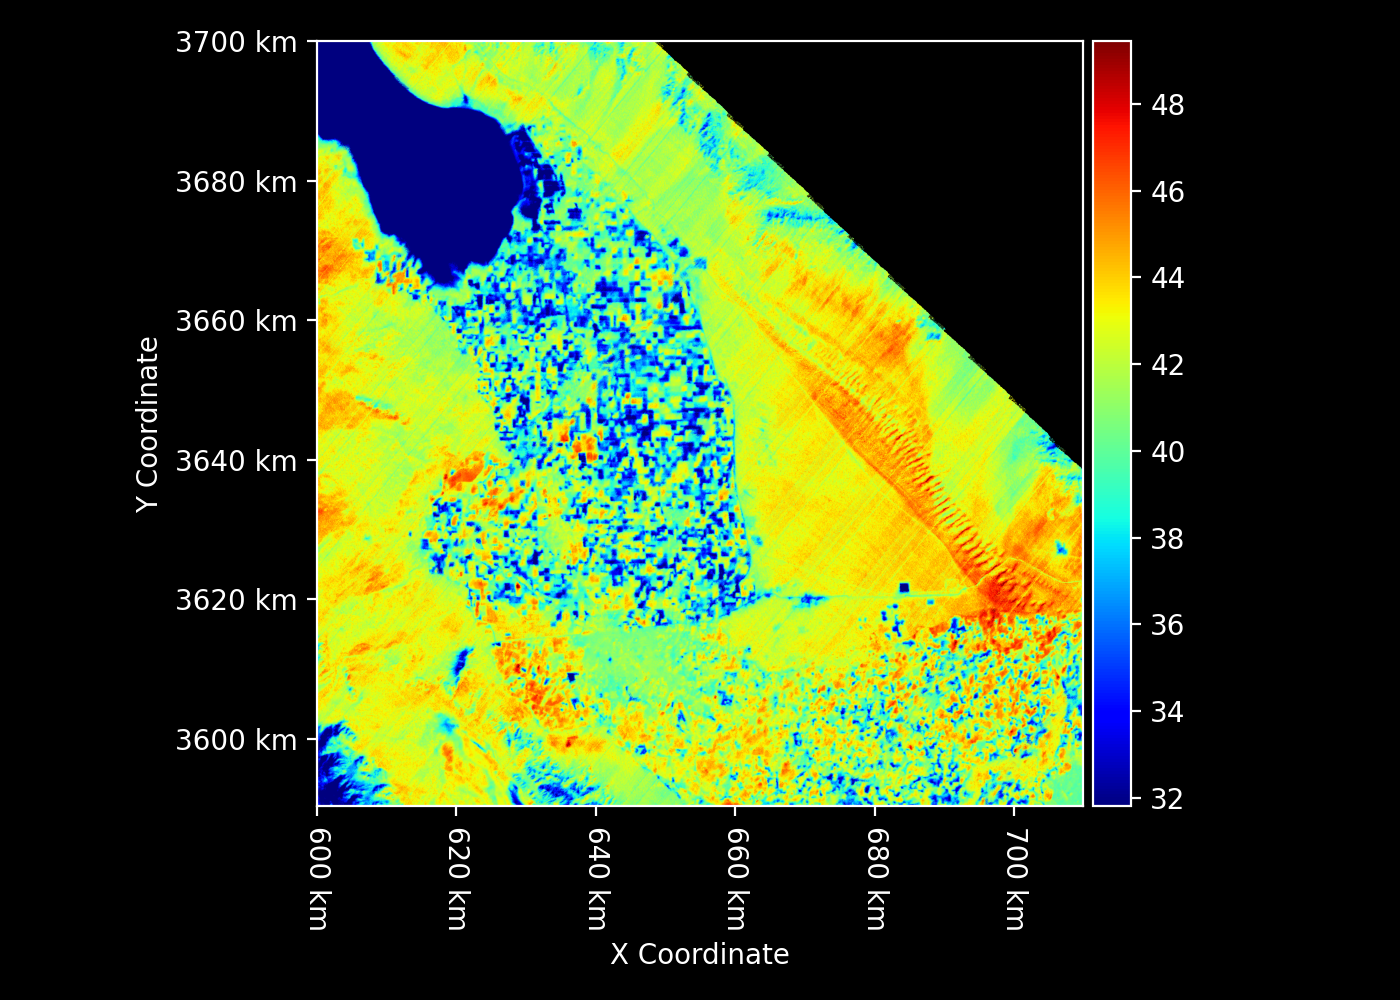

In [5]:
L2T_LSTE_granule.ST_C

Retrieve L2T STARS granule from CMR API as prior

In [6]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_STARS_granule

L2TSTARS("/Users/gregoryhalverson/data/ECOSTRESS/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

Load and display preview of vegetation index

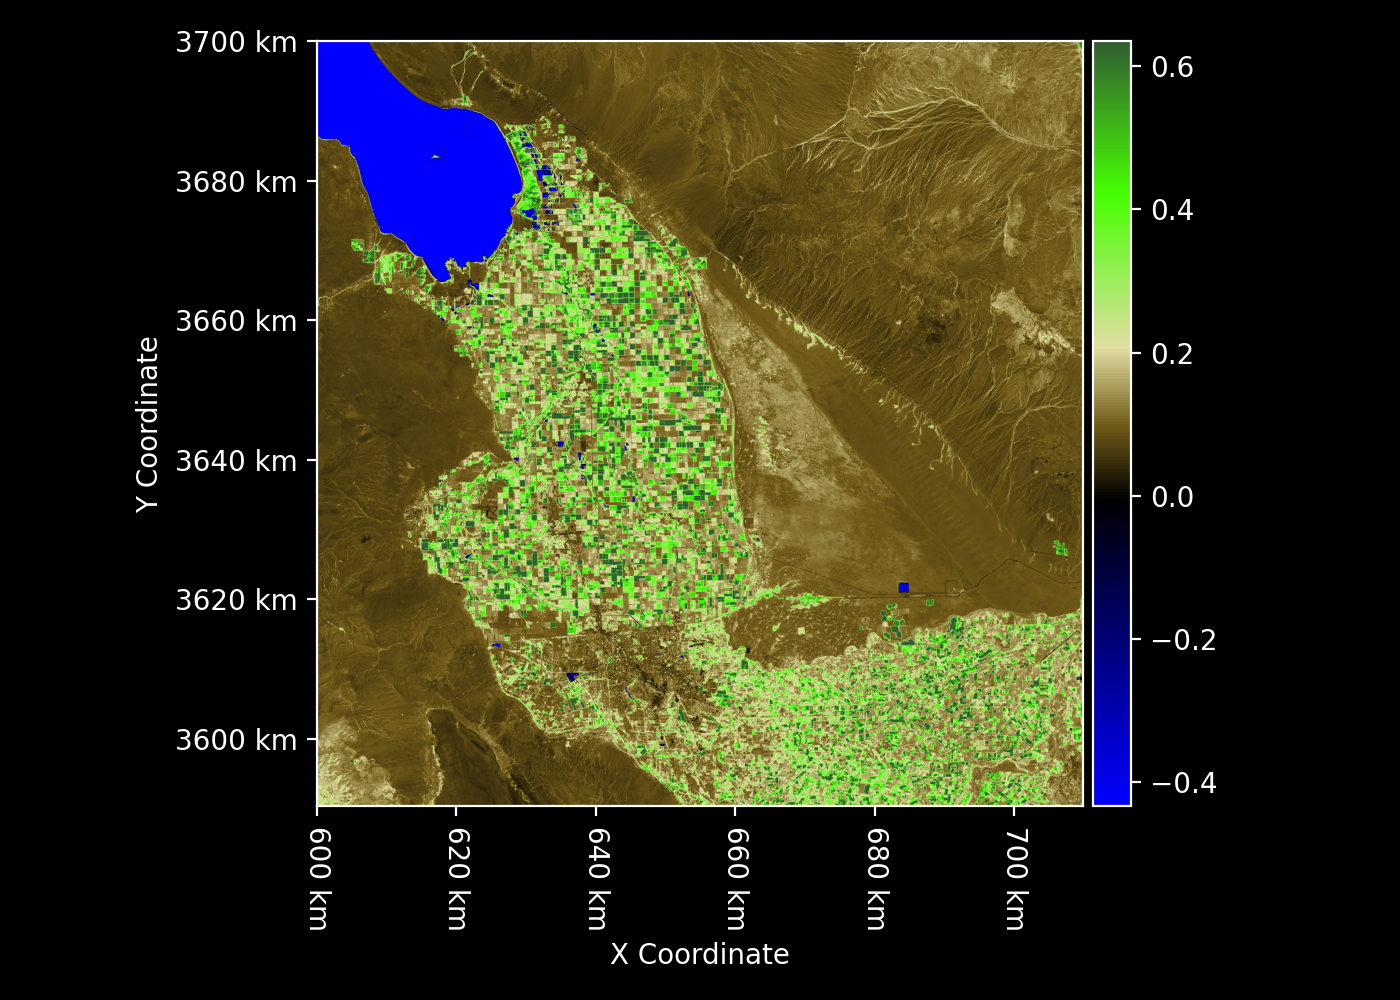

In [7]:
L2T_STARS_granule.NDVI

Generate XML run-config file for L3T L4T JET PGE run

In [8]:
runconfig_filename = generate_L3T_L4T_JET_runconfig(
    L2T_LSTE_filename=L2T_LSTE_granule.product_filename,
    L2T_STARS_filename=L2T_STARS_granule.product_filename,
    working_directory=working_directory,
    static_directory=static_directory
)

runconfig_filename

'/Users/gregoryhalverson/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml'

In [9]:
with open(runconfig_filename, "r") as f:
    print(f.read())

<?xml version="1.0" encoding="UTF-8"?>
<input xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xmlns:xalan="http://xml.apache.org/xslt"
       xmlns:cas="http://oodt.jpl.nasa.gov/1.0/cas"
       xsi:noNamespaceSchemaLocation="">
    <group name="LogMetadata">
        <vector name="CommandLineParameters">
            <element>L3T_L4T_JET</element>
            <element>/Users/gregoryhalverson/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml</element>
            <element>/Users/gregoryhalverson/data/ECOSTRESS/log/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.log</element>
        </vector>
    </group>
    <group name="JobIdentification">
        <scalar name="ProductionLocation">ECOSTRESS Science Computing Facility</scalar>
        <scalar name="TaskId">urn:ecostress:L2GL2TLSTETask</scalar>
        <scalar name="ProcessingNode">Mac.lan</scalar>
        <scalar name="ProductionDateTime">2025-11-17 23:30:53.919283</scalar>
        

In [10]:
exit_code = L3T_L4T_JET(runconfig_filename=runconfig_filename)
exit_code

[2025-11-17 15:30:53 INFO] started L3T L4T JET run at 2025-11-17 23:30:53.944206 UTC
[2025-11-17 15:30:53 INFO] L3T_L4T_JET PGE (1.12.0)
[2025-11-17 15:30:53 INFO] L3T_L4T_JET run-config: /Users/gregoryhalverson/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml
[2025-11-17 15:30:53 INFO] L3T JET granule ID: ECOv003_L3T_JET_35698_014_11SPS_07131117T000000_01
[2025-11-17 15:30:53 INFO] L3T JET granule directory: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_07131117T000000_01
[2025-11-17 15:30:53 INFO] L3T JET zip file: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_07131117T000000_01.zip
[2025-11-17 15:30:53 INFO] L3T JET preview: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_07131117T000000_01.png
[2025-11-17 15:30:53 INFO] L3T ETAUX granule directory: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_E

/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/PTJPLSM/partitioning/fTRM.py:27: RuntimeWarning: invalid value encountered in sqrt
  CHscalar = np.sqrt(canopy_height_meters)


[2025-11-17 15:33:55 INFO] variable fTRM min: 0.000 mean: 0.804 max: 0.988 nan: 21.74% (nan)
[2025-11-17 15:33:55 INFO] variable LE_canopy_Wm2 min: 0.001 mean: 55.350 max: 442.984 nan: 22.43% (nan)
[2025-11-17 15:33:55 INFO] variable LE_interception_Wm2 min: 0.000 mean: 1.250 max: 24.715 nan: 21.18% (nan)
[2025-11-17 15:33:56 INFO] variable LE_Wm2 min: 2.403 mean: 74.656 max: 485.645 nan: 22.54% (nan)
[2025-11-17 15:33:56 INFO] started daylight ET upscaling
[2025-11-17 15:34:31 INFO] completed daylight ET upscaling (elapsed: 35.04 seconds)
[2025-11-17 15:34:31 INFO] PT-JPL-SM model run complete (elapsed: 42.85 seconds)
[2025-11-17 15:34:31 INFO] variable LE_PTJPLSM_Wm2 on 2024-10-22 at 11SPS min: 2.403 mean: 74.656 max: 485.645 nan: 22.54% (nan)
[2025-11-17 15:34:31 INFO] variable ET_daylight_PTJPLSM_kg on 2024-10-22 at 11SPS min: 0.033 mean: 0.803 max: 5.056 nan: 22.54% (nan)
[2025-11-17 15:34:31 INFO] variable G_PTJPLSM on 2024-10-22 at 11SPS min: 0.000 mean: 98.061 max: 125.695 nan:

/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-11-17 15:34:35 INFO] variable G_Wm2 min: 0.000 mean: 98.061 max: 125.695 nan: 15.66% (nan)
[2025-11-17 15:34:35 INFO] calculating PM-MOD meteorology
[2025-11-17 15:34:35 INFO] variable specific_humidity min: 0.007 mean: 0.010 max: 0.012 nan: 15.66% (nan)
[2025-11-17 15:34:35 INFO] variable rho_kgm3 min: 1.122 mean: 1.155 max: 1.465 nan: 15.66% (nan)
[2025-11-17 15:34:35 INFO] variable Cp_Jkg min: 1010.678 mean: 1013.642 max: 1015.168 nan: 15.66% (nan)
[2025-11-17 15:34:35 INFO] variable delta_Pa min: 188.979 mean: 259.949 max: 321.979 nan: 15.66% (nan)
[2025-11-17 15:34:35 INFO] variable fwet (float32) with [1.e-04    nan] unique values
[2025-11-17 15:34:35 INFO] * 1e-04: 2073568
[2025-11-17 15:34:35 INFO] * nan: 385056
[2025-11-17 15:34:35 INFO] calculating PM-MOD resistances
[2025-11-17 15:34:35 INFO] variable gl_sh min: 0.018 mean: 0.021 max: 0.043 nan: 0.35% (nan)
[2025-11-17 15:34:35 INFO] variable rhc (float32) with [1999.9999       nan] unique values
[2025-11-17 15:34:35 I

/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-11-17 15:34:35 INFO] * nan: 529377
[2025-11-17 15:34:36 INFO] variable rrc min: 170.093 mean: 182.553 max: 241.403 nan: 15.66% (nan)
[2025-11-17 15:34:36 INFO] variable rhrc min: 156.761 mean: 166.994 max: 213.760 nan: 21.53% (nan)
[2025-11-17 15:34:36 INFO] variable gl_e_wv min: 0.018 mean: 0.021 max: 0.043 nan: 0.35% (nan)
[2025-11-17 15:34:36 INFO] variable rvc (float32) with [1999.9999       nan] unique values
[2025-11-17 15:34:36 INFO] * 1999.9999: 1929247
[2025-11-17 15:34:36 INFO] * nan: 529377


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-11-17 15:34:36 INFO] variable Ac min: 0.000 mean: 119.010 max: 691.604 nan: 15.66% (nan)
[2025-11-17 15:34:36 INFO] variable LE_interception_Wm2 min: 0.000 mean: 0.004 max: 0.020 nan: 21.53% (nan)
[2025-11-17 15:34:36 INFO] variable rcorr min: 0.902 mean: 0.938 max: 1.200 nan: 15.66% (nan)
[2025-11-17 15:34:37 INFO] variable CL min: 0.006 mean: 0.007 max: 0.007 nan: 0.35% (nan)


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(
/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-11-17 15:34:37 INFO] variable Tmin_open min: 8.333 mean: 11.933 max: 12.413 nan: 0.35% (nan)
[2025-11-17 15:34:37 INFO] variable Tmin_closed (float32) with [-8. nan] unique values
[2025-11-17 15:34:37 INFO] * -8.0: 2449941
[2025-11-17 15:34:37 INFO] * nan: 8683
[2025-11-17 15:34:37 INFO] variable Tmin_C min: 27.198 mean: 30.858 max: 32.231 nan: 0.00% (nan)


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-11-17 15:34:37 INFO] variable mTmin (float64) with [ 1. nan] unique values
[2025-11-17 15:34:37 INFO] * 1.0: 2449941
[2025-11-17 15:34:37 INFO] * nan: 8683
[2025-11-17 15:34:37 INFO] variable VPD_open (float32) with [650.  nan] unique values
[2025-11-17 15:34:37 INFO] * 650.0: 2449941
[2025-11-17 15:34:37 INFO] * nan: 8683


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(
/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-11-17 15:34:37 INFO] variable VPD_closed min: 4385.504 mean: 4497.309 max: 4512.204 nan: 0.35% (nan)
[2025-11-17 15:34:37 INFO] variable mVPD min: 0.139 mean: 0.411 max: 0.727 nan: 16.01% (nan)
[2025-11-17 15:34:38 INFO] variable gs1 min: 0.001 mean: 0.003 max: 0.005 nan: 16.01% (nan)
[2025-11-17 15:34:38 INFO] variable Gcu min: 0.000 mean: 0.000 max: 0.000 nan: 15.66% (nan)
[2025-11-17 15:34:38 INFO] variable Cc min: 0.001 mean: 0.001 max: 0.011 nan: 0.35% (nan)
[2025-11-17 15:34:38 INFO] variable rs min: 93.676 mean: 1774.939 max: 2000.000 nan: 0.35% (nan)
[2025-11-17 15:34:38 INFO] variable rh min: 93.676 mean: 1774.939 max: 2000.000 nan: 0.35% (nan)
[2025-11-17 15:34:38 INFO] variable rr min: 170.093 mean: 182.553 max: 241.403 nan: 15.66% (nan)
[2025-11-17 15:34:38 INFO] variable ra min: 20.613 mean: 38.828 max: 43.555 nan: 16.01% (nan)
[2025-11-17 15:34:38 INFO] variable LE_canopy_Wm2 min: 0.000 mean: 28.934 max: 489.901 nan: 0.00% (nan)
[2025-11-17 15:34:39 INFO] variable R

/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(
/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-11-17 15:34:39 INFO] variable RBL_min (float32) with [20. nan] unique values
[2025-11-17 15:34:39 INFO] * 20.0: 2449941
[2025-11-17 15:34:39 INFO] * nan: 8683
[2025-11-17 15:34:39 INFO] variable rtotc min: 24.271 mean: 32.363 max: 45.960 nan: 16.01% (nan)
[2025-11-17 15:34:39 INFO] variable rtot min: 21.985 mean: 30.350 max: 50.591 nan: 16.01% (nan)
[2025-11-17 15:34:39 INFO] variable rrs min: 170.093 mean: 182.553 max: 241.403 nan: 15.66% (nan)
[2025-11-17 15:34:39 INFO] variable ras min: 19.468 mean: 26.011 max: 41.763 nan: 16.01% (nan)
[2025-11-17 15:34:39 INFO] variable Asoil min: 0.000 mean: 285.132 max: 697.724 nan: 15.66% (nan)
[2025-11-17 15:34:40 INFO] variable wet_soil_evaporation_Wm2 min: 0.000 mean: 0.052 max: 0.090 nan: 16.01% (nan)
[2025-11-17 15:34:40 INFO] variable potential_soil_evaporation_Wm2 min: 0.000 mean: 518.077 max: 897.775 nan: 16.01% (nan)
[2025-11-17 15:34:40 INFO] variable fSM min: 0.000 mean: 0.000 max: 0.003 nan: 15.66% (nan)
[2025-11-17 15:34:40 IN

/Users/gregoryhalverson/Projects/ECOv003-L3T-L4T-JET/ECOv003_L3T_L4T_JET/JET.py:392: RuntimeWarning: All-NaN slice encountered
  np.nanmedian([np.array(LE_PTJPLSM_Wm2), np.array(LE_BESS_Wm2), np.array(LE_PMJPL_Wm2), np.array(LE_STIC_Wm2)], axis=0),


[2025-11-17 15:35:17 INFO] retrieving U2M from GEOS-5 FP inst3_2d_asm_Nx U2M for 2024-10-22 18:36 UTC
[2025-11-17 15:35:17 INFO] searching GEOS-5 FP inst3_2d_asm_Nx at 2024-10-22 18:36:27 UTC
[2025-11-17 15:35:18 INFO] checking existing file: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.inst3_2d_asm_Nx.20241022_1800.V01.nc4
[2025-11-17 15:35:18 INFO] existing file is valid: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.inst3_2d_asm_Nx.20241022_1800.V01.nc4 (43.34 MB)
[2025-11-17 15:35:18 INFO] checking existing file: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.inst3_2d_asm_Nx.20241022_2100.V01.nc4
[2025-11-17 15:35:19 INFO] existing file is valid: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.inst3_2d_asm_Nx.20241022_2100.V01.nc4 (43.31 MB)
[2025-11-17 15:35:19 INFO] interpo

/Users/gregoryhalverson/Projects/ECOv003-L3T-L4T-JET/ECOv003_L3T_L4T_JET/JET.py:475: RuntimeWarning: All-NaN slice encountered
  ET_daylight_kg = np.nanmedian([


[2025-11-17 15:36:26 INFO] variable ET_daylight_kg on 2024-10-22 at 11SPS min: 0.024 mean: 0.945 max: 6.020 nan: 15.66% (nan)


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


AttributeError: 'L3TL4TJETConfig' object has no attribute 'time_UTC'